In [1]:
import numpy as np
from numpy.linalg import pinv, inv
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import math

In [2]:
def read_data_from_file(filepath):
    f = open(filepath)
    lines = f.readlines()
    m = int(lines[0])
    n_train = int(lines[1])
    train = []
    test = []
    for i in range(2, n_train + 2):
        train.append([int(s) for s in lines[i].split(' ')])
    n_test = int(lines[n_train + 2])
    for i in range(n_train + 3, n_test + n_train + 3):
        test.append([int(s) for s in lines[i].split(' ')])
    train = np.array(train)
    test = np.array(test)

    X_train = train[:, :-1]
    y_train = train[:, -1]

    X_test = test[:, :-1]
    y_test = test[:, -1]
    return (X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = read_data_from_file("data/1.txt")

<img src="formula2.png" width="300" height="200">

In [3]:
b = pinv(X_train).dot(y_train)

l = 1e6
_, m = X_train.shape
I = np.eye(m)

b_reg = inv(((X_train.T).dot(X_train)) + l*I).dot(X_train.T).dot(y_train)

<img src="formula.png" width="300" height="200">

In [4]:
def gradient_descent(X, y, iters):
    _, m = X.shape
    w = np.zeros(m)
    a = 1e-19
    for i in range(iters):
        y_pred = X.dot(w)
        grad = 2 * X.T.dot(y_pred - y)
        w = w - a * grad
    return w
#Q = sum(<w, x> - y)^2 square(LDA)

In [5]:
def nrmse(X, y, w):
    pred = X.dot(w)
    rmse = np.sqrt(np.mean((pred-y)**2))
    y_max = np.max(y)
    y_min = np.min(y)
    return rmse / (y_max - y_min)

In [6]:
y_predicted = X_test.dot(b_reg)
y_predicted_pinv = X_test.dot(b)

r_pseudo = r2_score(y_test, y_predicted_pinv)
print ("pseudoinverse r2 -", r_pseudo)

r_pseudo_reg = r2_score(y_test, y_predicted)
print ("pseudoinverse with reg r2 -", r_pseudo_reg)

w = gradient_descent(X_train, y_train, 1000)
r_gradient = r2_score(y_test, X_test.dot(w))
print ("gradient descent r2 -", r_gradient)

reg = LinearRegression().fit(X_train, y_train)
r_lib = reg.score(X_test, y_test)
print ("Linear Regression lib -", r_lib)

pseudoinverse r2 - 0.9999998713104752
pseudoinverse with reg r2 - 0.9999997981252285
gradient descent r2 - 0.9966460484580263
Linear Regression lib - 0.9999998693632498


In [7]:
def draw_nrsme_steps_dependency(filepath):
    X_train, y_train, X_test, y_test = read_data_from_file(filepath)
    b_pinv = pinv(X_train).dot(y_train)
    train_res = []
    test_res = []
    pinv_res = []
    for i in range(0, 1000, 100):
        w = gradient_descent(X_train, y_train, i)
        train_res.append(nrmse(X_train, y_train, w))
        test_res.append(nrmse(X_test, y_test, w))
    print(nrmse(X_test, y_test, b_pinv))
    plt.plot(range(0, 1000, 100), train_res, color = 'green')
    plt.plot(range(0, 1000, 100), test_res, color='blue')
    plt.title(filepath)
    plt.show()

6.175183322756424e-05


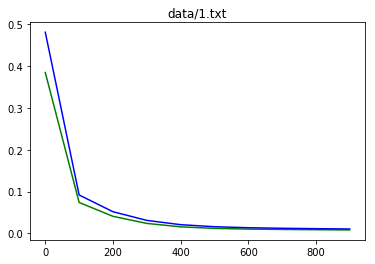

In [8]:
draw_nrsme_steps_dependency("data/1.txt")

4.462927080023984e-06


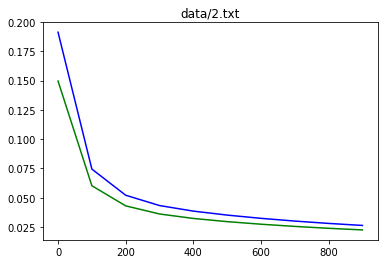

In [9]:
draw_nrsme_steps_dependency("data/2.txt")

0.0005214562439237523


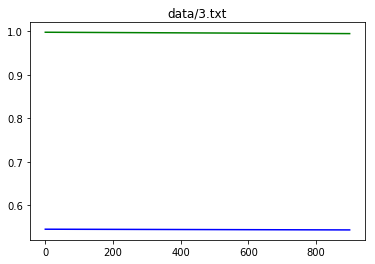

In [10]:
draw_nrsme_steps_dependency("data/3.txt")

0.00018362668198850443


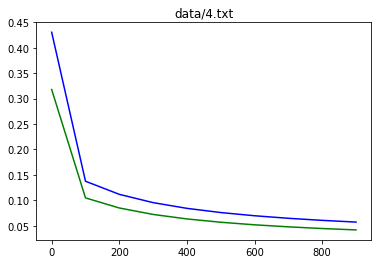

In [11]:
draw_nrsme_steps_dependency("data/4.txt")

3.4409537154420204e-08


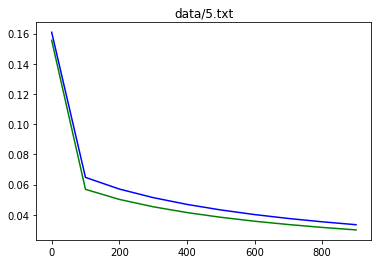

In [12]:
draw_nrsme_steps_dependency("data/5.txt")

0.0004930567997577304


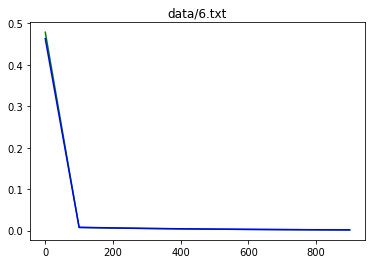

In [13]:
draw_nrsme_steps_dependency("data/6.txt")

6.948549235810288e-07


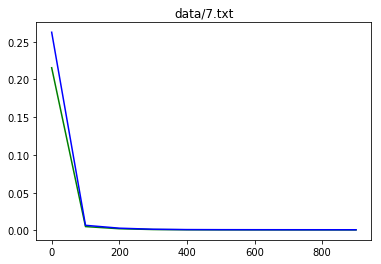

In [14]:
draw_nrsme_steps_dependency("data/7.txt")